In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from pathlib import Path
import random
import glob

#Loading Data

In [ ]:
!unzip /content/drive/MyDrive/CVision/skin-disease-dataset.zip

In [ ]:
train_dir = '/content/skin-disease-datasaet/train_set'
test_dir = '/content/skin-disease-datasaet/test_set'

# Initialize counters
total_train_images = 0
total_test_images = 0

for category in os.listdir(train_dir):
  category_dir = os.path.join(train_dir, category)
  num_images = len(os.listdir(category_dir))
  print(f"Train - {category}: {num_images} images")
  total_train_images += num_images


for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir, category)
  num_images = len(os.listdir(category_dir))
  print(f"Test - {category}: {num_images} images")
  total_test_images += num_images

Train - PA-cutaneous-larva-migrans: 100 images
Train - VI-shingles: 130 images
Train - VI-chickenpox: 136 images
Train - FU-athlete-foot: 124 images
Train - FU-ringworm: 90 images
Train - FU-nail-fungus: 129 images
Train - BA-impetigo: 80 images
Train - BA- cellulitis: 136 images
Test - PA-cutaneous-larva-migrans: 25 images
Test - VI-shingles: 33 images
Test - VI-chickenpox: 34 images
Test - FU-athlete-foot: 32 images
Test - FU-ringworm: 23 images
Test - FU-nail-fungus: 33 images
Test - BA-impetigo: 20 images
Test - BA- cellulitis: 34 images


In [ ]:
print(f"Total Train images: {total_train_images}")
print(f"Total Test images: {total_test_images}")

Total Train images: 925
Total Test images: 234


# Data Visualization

In [ ]:
# Train set classes
classes = os.listdir("/content/skin-disease-datasaet/train_set")
print(f"Total Classes = {len(classes)}")
print(f"Classes: {classes}")

Total Classes = 8
Classes: ['PA-cutaneous-larva-migrans', 'VI-shingles', 'VI-chickenpox', 'FU-athlete-foot', 'FU-ringworm', 'FU-nail-fungus', 'BA-impetigo', 'BA- cellulitis']


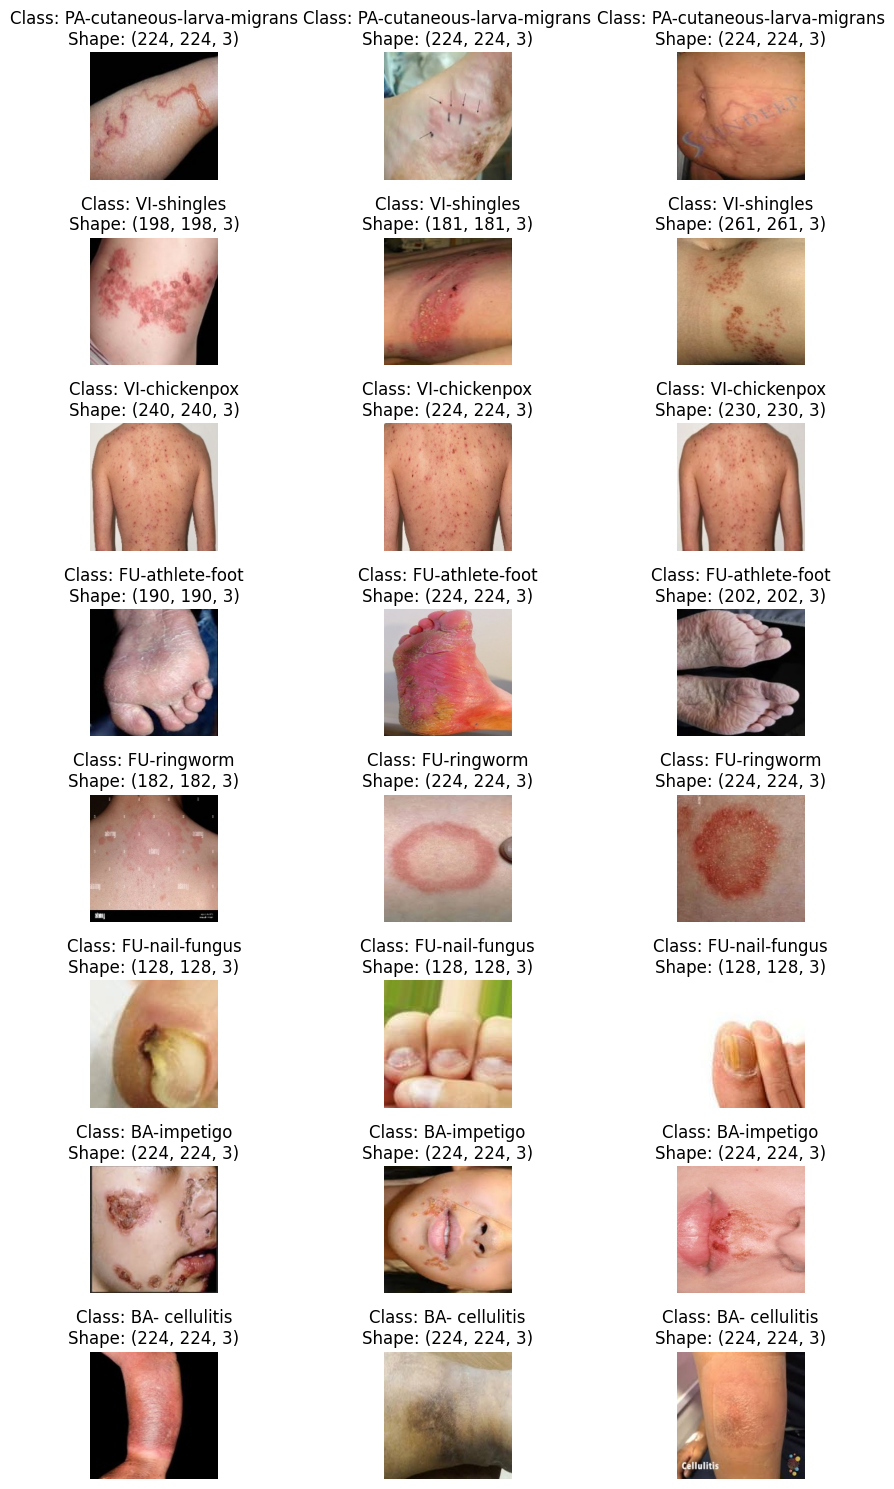

In [ ]:
NUM_IMAGES = 3

fig, ax = plt.subplots(nrows = len(classes), ncols = NUM_IMAGES, figsize = (10, 15))

row = 0
for c in classes:
  img_path_class = list(Path(os.path.join(train_dir, c)).glob("*.jpg"))
  img_selected = random.choices(img_path_class, k = NUM_IMAGES)

  for i, j in enumerate(img_selected):
    img_bgr = cv2.imread(str(j))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    ax[row, i].imshow(img_rgb)
    ax[row, i].set_title(f"Class: {c}\nShape: {img_rgb.shape}")
    ax[row, i].axis("off")
  row += 1

fig.tight_layout()
fig.show()

# Data Preprocessing

### Train Data

In [ ]:
import pathlib
data_dir=pathlib.Path(train_dir)
disease_images_train_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
}

In [ ]:
disease_train_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7
}

In [ ]:
IMG_SIZE = 10

x_train = []
y_train = []

for image_name, image_paths in disease_images_train_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        x_train.append(image_resize)
        y_train.append(disease_train_label_dic[image_name])

In [ ]:
x_train[0].shape

(10, 10, 3)

In [ ]:
len(x_train)

925

In [ ]:
len(y_train)

925

In [ ]:
y_train=np.array(y_train)
x_train=np.array(x_train)
y_train.shape

(925,)

### Test Data

In [ ]:
data_dir=pathlib.Path(test_dir)
disease_images_test_dic={
    'cellulitis':list(data_dir.glob('BA- cellulitis/*')),
    'impetigo':list(data_dir.glob('BA-impetigo/*')),
    'athlete-foot':list(data_dir.glob('FU-athlete-foot/*')),
    'nail-fungus':list(data_dir.glob('FU-nail-fungus/*')),
    'ringworm':list(data_dir.glob('FU-ringworm/*')),
    'cutaneous-larva-migrans':list(data_dir.glob('PA-cutaneous-larva-migrans/*')),
    'chickenpox':list(data_dir.glob('VI-chickenpox/*')),
    'shingles':list(data_dir.glob('VI-shingles/*')),
}
disease_test_label_dic={
    'cellulitis': 0,
    'impetigo': 1,
    'athlete-foot': 2,
    'nail-fungus': 3,
    'ringworm': 4,
    'cutaneous-larva-migrans':5,
    'chickenpox':6,
    'shingles':7,
}

In [ ]:
IMG_SIZE = 10
x_test = []
y_test = []

for image_name, image_paths in disease_images_test_dic.items():
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        if img is None:
            continue
        image_resize=cv2.resize(img,(IMG_SIZE, IMG_SIZE))
        x_test.append(image_resize)
        y_test.append(disease_test_label_dic[image_name])

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)
y_test.shape

(234,)

In [ ]:
x_test.shape

(234, 10, 10, 3)

In [ ]:
x_test[0]

array([[[243, 241, 196],
        [233, 229, 180],
        [230, 229, 178],
        [214, 215, 159],
        [242, 239, 191],
        [249, 249, 213],
        [251, 236, 189],
        [253, 255, 252],
        [203, 250, 222],
        [218, 243, 199]],

       [[212, 211, 153],
        [212, 210, 152],
        [206, 206, 143],
        [199, 199, 135],
        [207, 199, 136],
        [178, 178, 114],
        [197, 195, 135],
        [255, 255, 239],
        [222, 211, 149],
        [159, 199, 156]],

       [[199, 198, 134],
        [213, 233, 228],
        [199, 206, 163],
        [195, 197, 130],
        [178, 176, 111],
        [153, 154,  88],
        [175, 172, 108],
        [185, 182, 126],
        [228, 228, 193],
        [253, 254, 247]],

       [[ 82, 134, 163],
        [ 98, 150, 180],
        [108, 160, 187],
        [122, 170, 193],
        [128, 172, 195],
        [116, 153, 191],
        [119, 159, 192],
        [122, 158, 198],
        [135, 173, 205],
        [146, 183, 209]],

       [[ 89, 131, 159],
        [ 79, 123, 152],
        [ 83, 122, 160],
        [ 90, 128, 164],
        [ 79, 110, 162],
        [ 93, 123, 164],
        [102, 133, 172],
        [102, 130, 176],
        [121, 147, 188],
        [140, 165, 197]],

       [[101, 135, 158],
        [ 82, 117, 143],
        [ 75, 102, 139],
        [ 70,  92, 134],
        [ 65,  84, 141],
        [ 77,  94, 150],
        [ 93, 113, 158],
        [106, 126, 167],
        [121, 142, 180],
        [140, 156, 185]],

       [[ 93, 119, 134],
        [ 79, 100, 113],
        [ 64,  85, 106],
        [ 60,  72, 108],
        [ 58,  64, 109],
        [ 65,  75, 122],
        [ 85,  94, 131],
        [101, 111, 144],
        [116, 130, 158],
        [125, 139, 162]],

       [[ 77,  86,  84],
        [ 90,  90,  57],
        [ 91,  90,  62],
        [ 26,  27,  19],
        [ 46,  54,  70],
        [ 56,  62,  84],
        [ 65,  72,  96],
        [ 71,  77,  97],
        [ 48,  46,  52],
        [101,  93,  60]],

       [[141, 148,  91],
        [163, 164, 108],
        [193, 181, 115],
        [159, 160, 104],
        [170, 166, 113],
        [189, 180, 121],
        [176, 175, 115],
        [204, 200, 141],
        [209, 207, 149],
        [223, 219, 168]],

       [[159, 166, 105],
        [184, 183, 123],
        [191, 189, 125],
        [203, 198, 135],
        [219, 206, 144],
        [207, 198, 135],
        [207, 202, 142],
        [228, 219, 160],
        [223, 215, 155],
        [234, 226, 173]]], dtype=uint8)

In [ ]:
from sklearn.manifold import TSNE

# Reshape the array to (925, 300) as each image has 10x10x3 attributes
images_array_reshaped = x_train.reshape(925, -1)
# Convert the reshaped array to a pandas DataFrame
df = pd.DataFrame(images_array_reshaped)
df.shape

(925, 300)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,16,12,17,37,39,33,41,38,28,18,19,15,37,36,32,155,153,145,145,146,137,166,167,165,168,163,160,210,211,201,116,128,149,97,101,130,52,57,55,165,160,159,164,155,152,136,138,149,187,181,...,143,182,241,239,237,228,235,232,247,239,240,238,236,236,207,214,229,239,241,239,233,231,231,240,239,241,238,233,238,240,239,241,236,232,235,239,236,238,234,232,232,245,243,243,245,246,244,220,220,214
1,101,103,104,116,119,119,48,53,65,12,10,9,8,8,8,10,10,10,7,7,7,13,12,12,56,59,64,107,110,115,113,116,121,115,119,125,187,203,223,127,145,206,32,35,60,5,5,18,126,145,...,36,75,64,70,77,11,13,15,25,30,76,45,63,128,55,64,144,65,81,98,96,133,178,71,106,146,45,80,113,45,78,104,41,62,89,32,53,72,30,54,70,75,93,110,23,26,75,74,90,139
2,56,55,153,162,174,146,175,189,164,165,178,152,175,188,162,191,201,177,193,206,180,195,209,185,203,217,189,182,192,162,92,86,173,138,163,149,167,180,160,171,186,158,187,202,174,222,231,204,189,201,...,33,55,140,154,160,200,213,186,212,228,187,145,157,138,226,234,203,188,202,166,170,177,150,161,173,153,149,167,144,142,157,143,140,156,136,169,187,164,214,218,182,214,220,188,172,188,154,132,144,126
3,19,17,17,19,17,16,17,15,14,18,16,16,18,16,16,16,14,14,20,16,15,24,19,18,18,11,18,205,195,212,146,151,190,79,84,131,80,81,120,84,89,123,18,23,37,12,15,16,18,16,...,10,9,22,18,13,13,15,11,23,17,18,27,18,18,31,22,18,31,21,14,18,13,10,14,11,7,23,16,13,12,10,9,21,14,11,18,13,10,26,19,16,26,19,12,29,21,14,33,23,16
4,144,173,224,135,155,216,69,68,37,106,94,36,113,98,36,117,104,36,111,96,34,110,94,34,113,97,33,114,100,34,151,170,215,180,198,245,143,171,232,98,129,182,77,90,113,79,75,54,105,93,...,122,51,139,128,49,85,84,55,159,180,212,164,182,222,183,205,241,179,196,238,138,119,46,132,119,40,134,121,46,134,121,44,132,123,50,139,128,54,139,128,51,96,97,55,151,164,198,165,184,227


In [ ]:
# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=10, method = 'exact', random_state=42)

# Fit and transform the data
tsne_data = tsne.fit_transform(images_array_reshaped)

# Convert the t-SNE result to a DataFrame
tsne_df = pd.DataFrame(tsne_data)
tsne_df.shape


(925, 10)

In [ ]:
tsne_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.886040,1.651585,4.116615,-2.321174,-1.219368,1.118890,-0.079240,-0.849280,0.163334,-2.507942
1,5.995655,1.374053,0.375130,2.091157,0.080806,-0.162789,0.732457,-1.842401,-1.435286,2.446333
2,-3.516841,2.341301,-2.318268,3.624894,1.185414,-0.295658,0.126492,-0.654167,0.234232,-3.342166
3,6.518647,2.458454,0.682317,5.966907,0.910353,-2.507586,-0.018881,-0.026724,0.737372,-1.191815
4,3.358065,-3.231477,1.369209,-2.770426,2.731210,0.484208,-0.159566,0.445356,2.608976,2.542928


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
scaled_data = scaler.fit_transform(tsne_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=tsne_df.columns)

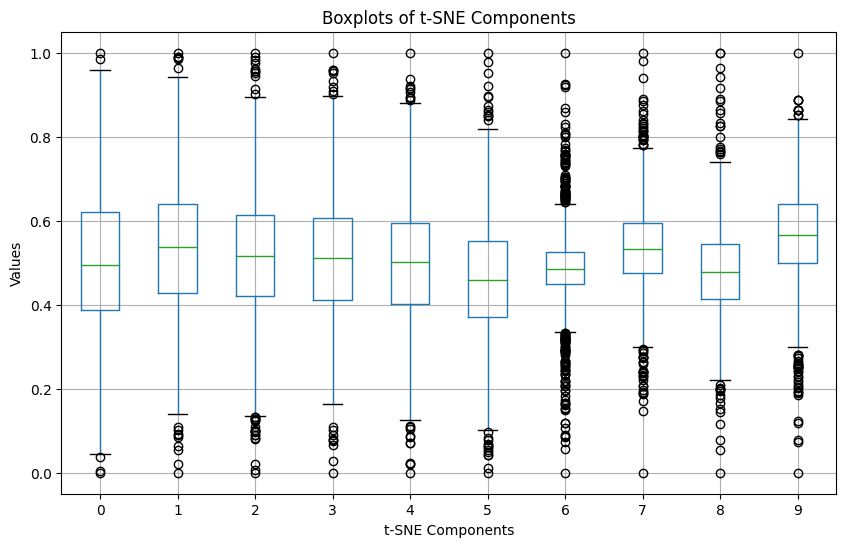

In [ ]:
# Plot the t-SNE result
plt.figure(figsize=(10, 6))
scaled_df.boxplot()
plt.title('Boxplots of t-SNE Components')
plt.xlabel('t-SNE Components')
plt.ylabel('Values')
plt.show()